<hr style="border:2px solid #FEC60D"> </hr>
<center><h1 style="color:#173F8A;"> Algebra Lineal Aplicada para Ciencia de Datos</h1></center> 
<center><h1 style="color:#173F8A;"> MDS 3120</h1></center>
<hr style="border:2px solid #FEC60D"> </hr>
<h3 style="color:#0176DE;text-align:right;"> Profesores: &nbsp;Manuel A. Sanchez<br>Carlos Sing-Long<br></h3>

<h3 style="color:#03122E;text-align:right;"> 
    Magister en Ciencia de Datos - MDS <br> 
    Instituto de Ingenieria Matematica y Computacional - IMC<br>  
    Pontificia Universidad Catolica de Chile <br>   
</h3>

<hr style="border:2px solid #03122E"> </hr>
<center><h1 style="color:#173F8A;"> Tutorial 2: Producto interior, normas y clustering</h1></center> 
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC:
Primaria: 
celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 
Secundaria
gris oscuro: #707070
-->

<h1>Tabla de Contenidos<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-normas-p" data-toc-modified-id="Ejempl0-color-RGB">Ejemplo: normas p
                </a>
            </span>
        </li>
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-angulo-entre-vectores" data-toc-modified-id="Imagenes">Ejemplo: angulo entre imagenes
                </a>
            </span>
        </li>    
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-similaridades-de-texto" data-toc-modified-id="Suma Imagenes">Ejemplo: similaridades de texto con angulo
                </a>
            </span>
        </li>    
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-clustering" data-toc-modified-id="flops">Ejemplo: clustering datos artificiales
                </a>
            </span>
        </li>    
    </ul>
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Ejemplo:-clustering-numeros" data-toc-modified-id="flops"> Ejemplo: clustering base de datos de digitos
                </a>
            </span>
        </li>    
    </ul>

</div>


In [1]:
import numpy as np
import scipy.linalg as lg
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
# !pip install threadpoolctl==3.2.0
from IPython.display import display, HTML
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Ejemplo: normas p

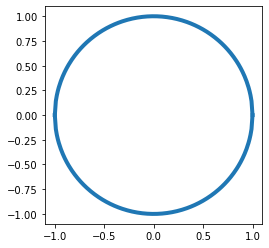

interactive(children=(FloatSlider(value=2.0, description='p', max=6.0, min=-2.0), Output()), _dom_classes=('wi…

In [2]:
# %matplotlib notebook
from ipywidgets import *
x1 = np.linspace(-1.0, 1.0, 200)
def val_norma(x1,p):
    x2pos = (np.abs(1.0 - np.abs(x1)**p))**(1/p)
    x2neg = -(np.abs(1.0 - np.abs(x1)**p))**(1/p)
    return x2pos, x2neg

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_aspect('equal', 'box')
linepos, = ax.plot(x1, val_norma(x1,p=2)[0],'C00', linewidth=4)
lineneg, = ax.plot(x1, val_norma(x1,p=2)[1],'C00', linewidth=4)
def update(p = 2.0):
    linepos.set_ydata(val_norma(x1,p)[0])
    lineneg.set_ydata(val_norma(x1,p)[1])
    fig.canvas.draw_idle()
interact(update);

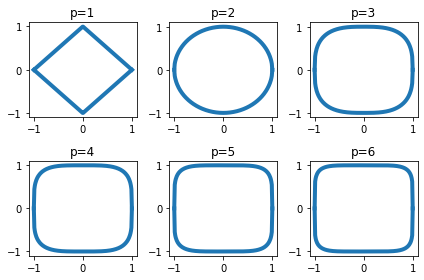

In [3]:
figplots, axplots = plt.subplots(2,3)
for p, axp in enumerate(figplots.axes):
    axp.plot(x1, val_norma(x1,p+1)[0],'C00', linewidth=4)
    axp.plot(x1, val_norma(x1,p+1)[1],'C00', linewidth=4)
    axp.title.set_text('p=' + str(p+1))
figplots.tight_layout()
# figplots.savefig('plotsnorms.png')
    

## Ejemplo: angulo entre vectores

(1024, 1024) 1048576


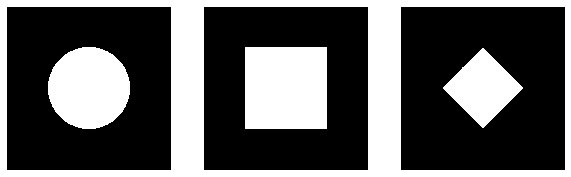

Angulo entre vector circulo y vector cuadrado: 27.69798601187887
Angulo entre vector circulo y vector rombo: 37.1497909700829


In [4]:
# draw_circle
N =1024
x = np.linspace(-1,1,N)
Circle = np.zeros((N,N), dtype=np.int64)
Square = np.zeros((N,N), dtype=np.int64)
Rombo = np.zeros((N,N), dtype=np.int64)
for j in range(N):
    for i in range(N):
        if x[i]**2+x[j]**2 < 0.5**2:
            Circle[i,j] = 1
        if x[i]<=0.5 and x[i]>=-0.5 and x[j]<=0.5 and x[j]>=-0.5:
            Square[i,j] = 1
        if 0.5 + x[i] - x[j]>=0 and 0.5 - x[i] - x[j]>=0 and 0.5 - x[i] + x[j]>=0 and 0.5 + x[i] + x[j]>=0: 
            Rombo[i,j] = 1
circlev = Circle.flatten()
squarev = Square.flatten()
rombov = Rombo.flatten()
print(Circle.shape, circlev.size)
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()
ax[0].imshow(Circle, cmap=plt.cm.gray, interpolation="nearest")
ax[1].imshow(Square, cmap=plt.cm.gray, interpolation="nearest")
ax[2].imshow(Rombo, cmap=plt.cm.gray, interpolation="nearest")
plt.show()

alpha_circle_square = np.arccos(np.dot(circlev,squarev)/(np.linalg.norm(circlev)*np.linalg.norm(squarev)))
alpha_circle_rombo = np.arccos(np.dot(circlev,rombov)/(np.linalg.norm(circlev)*np.linalg.norm(rombov)))

print(f"Angulo entre vector circulo y vector cuadrado: {alpha_circle_square*180/np.pi}")
print(f"Angulo entre vector circulo y vector rombo: {alpha_circle_rombo*180/np.pi}")

## Ejemplo: similaridades de texto

In [5]:
import re
import math

def preprocess_text(text):
    # Convert to lowercase and remove non-alphabetic characters
    text = re.sub(r'[^a-z]', ' ', text.lower())
    return text.split()

def count_words(text):
    # Count the occurrences of each word in the text
    word_count = {}
    for word in preprocess_text(text):
        word_count[word] = word_count.get(word, 0) + 1
    return word_count

def cosine_similarity(vector1, vector2):
    # Calculate the dot product of the two vectors
    dot_product = sum(vector1[key] * vector2[key] for key in vector1 if key in vector2)

    # Calculate the magnitude (Euclidean norm) of each vector
    magnitude1 = math.sqrt(sum(vector1[key] ** 2 for key in vector1))
    magnitude2 = math.sqrt(sum(vector2[key] ** 2 for key in vector2))

    # Calculate the cosine similarity
    if magnitude1 == 0 or magnitude2 == 0:
        return 0  # Avoid division by zero
    else:
        return dot_product / (magnitude1 * magnitude2)

# Sample texts
texto1 = "Algebra lineal es un topico importante en matematicas y fundamental en data science"
texto2 = "Los estudiantes del MCD deben ser capaces de comprender los fundamentos de esta area"
texto3 = " Inteligencia artificial y aplicaciones de algebra lineal son herramientas usadas en procesamiento de datos"


# Count the occurrences of words in the texts
vector1 = count_words(texto1)
vector2 = count_words(texto2)
vector3 = count_words(texto3)

# Calculate cosine similarity between text1 and text2
sim_texto1_texto2 = cosine_similarity(vector1, vector2)
sim_texto1_texto3 = cosine_similarity(vector1, vector3)
sim_texto2_texto3 = cosine_similarity(vector2, vector3)
print(f"Similaridad entre texto1 y texto2: {sim_texto1_texto2}")
print(f"Similaridad entre texto1 y texto3: {sim_texto1_texto3}")
print(f"Similaridad entre texto2 y texto3: {sim_texto2_texto3}")


Similaridad entre texto1 y texto2: 0.0
Similaridad entre texto1 y texto3: 0.3227486121839514
Similaridad entre texto2 y texto3: 0.23570226039551587


## Ejemplo: clustering

In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

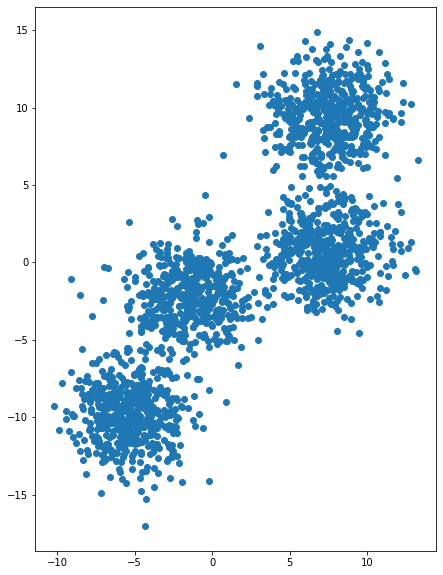

In [7]:
X, y = make_blobs(n_samples=2000, centers=4, cluster_std=1.9, random_state=8)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.scatter(X[:,0], X[:,1])
ax.set_aspect('equal')

In [8]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=1000, n_init=10, random_state=0)

*** J^clust: 14120.183312941776


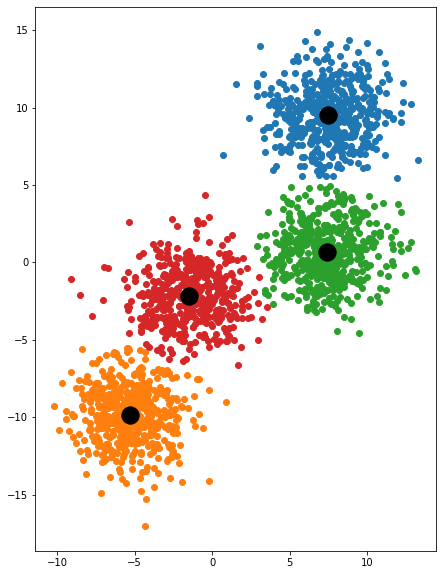

In [9]:
pred_y = kmeans.fit_predict(X)

c0, = np.where(kmeans.labels_==0)
c1, = np.where(kmeans.labels_==1)
c2, = np.where(kmeans.labels_==2)
c3, = np.where(kmeans.labels_==3)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
ax.scatter(X[c0,0], X[c0,1], c='C00')
ax.scatter(X[c1,0], X[c1,1], c='C01')
ax.scatter(X[c2,0], X[c2,1], c='C02')
ax.scatter(X[c3,0], X[c3,1], c='C03')
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black')
ax.set_aspect('equal')

print("*** J^clust:", kmeans.inertia_)
plt.show()

## Ejemplo: clustering numeros

In [10]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

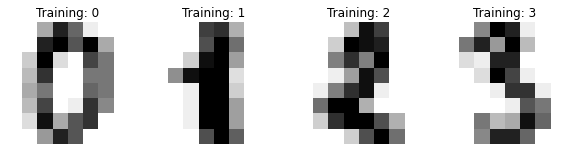

In [11]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [12]:
kmeans = KMeans(n_clusters=10, init='random', max_iter=20000, n_init=10, random_state=0)
arrnew = [arr_j.flatten() for arr_j in digits.images]

pred_y = kmeans.fit_predict(arrnew)

In [13]:
representatives =  kmeans.cluster_centers_
reps_images = [rep_j.reshape(8,8) for rep_j in representatives]

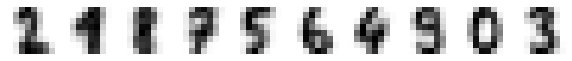

In [14]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, reps_image_j, label in zip(axes, reps_images, digits.target):
    ax.set_axis_off()
    ax.imshow(reps_image_j, cmap=plt.cm.gray_r, interpolation="nearest")
